In [1]:
pip install mysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysqlclient: filename=mysqlclient-2.1.1-cp39-cp39-linux_x86_64.whl size=107573 sha256=dbe6c391c1dd38ad8cf808575de288b77fa61ce5d3f2c2feb3010d15a32618f0
  Stored in directory: /root/.cache/pip/wheels/f3/a5/27/c6312d8008951cfd5511684378a9e057b82006c70e1fea6107
Successfully built mysqlclient


In [2]:
pip install mysql-connector-python-rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector-python-rf: filename=mysql_connector_python_rf-2.2.2-cp39-cp39-linux_x86_64.whl size=249472 sha256=58a6f79e72fa9c738f5fdfcc56a860900784106abd3ab0458697b6fc02332032
  Stored in directory: /root/.cache/pip/wheels/64/06/5b/ef9543936a3f5de15b02775b6ae548a09f3ed2319d20342771
Successfully built mysql-connector-python-rf


In [3]:
pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 41.5 MB/s eta 0:00:00


In [8]:
from pandas.io.sql import to_sql
import math
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

class Credentials:
    def __init__(self):
        self.user = "bootcamp_student"
        self.password = "goodRobot1"
        self.host ="107.180.55.15"
        self.port = 3306
        self.database = "data_bootcamp"

In [9]:
class Connection:
    def __init__(self,host,user,password,database):
        self.host= host
        self.user=user
        self.password=password
        self.database=database

    def connection(self):
        from mysql.connector import connect

        return connect(
            host = self.host,
            user=self.user,
            password= self.password,
            database = self.database
        )

creds = Credentials()
x= Connection(creds.host,creds.user,creds.password,creds.database)
con = x.connection()

In [10]:
class Read:
    def __init__(self, query_string,credentials):
        self.query_string=query_string
        self.credentials=credentials

    def get_data(self):
        con=Connection(
            host = self.credentials.host,
            user=self.credentials.user,
            password= self.credentials.password,
            database = self.credentials.database
        )

        raw_result=[]

        with con.connection() as connection:
            with connection.cursor() as cursor:
                cursor.execute(self.query_string)

                raw_result.append([i[0] for i in cursor.description])

                result = cursor.fetchall()
                for row in result:
                    raw_result.append(row)

        # con.close()
        good_result={}
        for i in range(len(raw_result[0])):
            header_name = raw_result[0][i]
            data_col = list(map(lambda x :x[i], raw_result[1:]))
            good_result[header_name] = data_col
        good_result=pd.DataFrame(good_result)

        return good_result

In [11]:
# Check the dataset
query_string = "select * from fb_stock;"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df 

,date,open,high,low,close,adj_close,volume
0,6/20/2019,190.95000,191.16000,187.64000,189.53000,189.53000,14635700
1,6/21/2019,188.75000,192.00000,188.75000,191.14000,191.14000,22751200
2,6/24/2019,192.42000,193.98000,191.57001,192.60001,192.60001,15509000
3,6/25/2019,192.88001,193.14000,188.13001,188.84000,188.84000,16750300
4,6/26/2019,189.53999,190.76000,187.31000,187.66000,187.66000,12808600
...,...,...,...,...,...,...,...
248,6/15/2020,225.09000,233.77000,224.80000,232.50000,232.50000,15340300
249,6/16/2020,237.14000,238.46001,233.00000,235.64999,235.64999,15236700
250,6/17/2020,235.00000,237.59000,231.73000,235.53000,235.53000,19552800
251,6/18/2020,234.99001,236.14000,232.14999,235.94000,235.94000,15782500


In [15]:
# Turn the date column from a string to a true date using str_to_date()

query_string = "select str_to_date(date, '%m/%d/%Y') as date, open, 	high, low,	close,	adj_close,	volume from fb_stock;"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df 

,date,open,high,low,close,adj_close,volume
0,2019-06-20,190.95000,191.16000,187.64000,189.53000,189.53000,14635700
1,2019-06-21,188.75000,192.00000,188.75000,191.14000,191.14000,22751200
2,2019-06-24,192.42000,193.98000,191.57001,192.60001,192.60001,15509000
3,2019-06-25,192.88001,193.14000,188.13001,188.84000,188.84000,16750300
4,2019-06-26,189.53999,190.76000,187.31000,187.66000,187.66000,12808600
...,...,...,...,...,...,...,...
248,2020-06-15,225.09000,233.77000,224.80000,232.50000,232.50000,15340300
249,2020-06-16,237.14000,238.46001,233.00000,235.64999,235.64999,15236700
250,2020-06-17,235.00000,237.59000,231.73000,235.53000,235.53000,19552800
251,2020-06-18,234.99001,236.14000,232.14999,235.94000,235.94000,15782500


In [18]:
# In which year did the stock have the highest median closing price?
'''
substring_index(substring_index(group_concat(close order by close separator ','), ',', count(*) / 2), ',', -1) as median_close: 
This line calculates the median closing price for each year using a combination of the group_concat(), substring_index(), and count() functions.
group_concat(close order by close separator ',') concatenates all the close values into a single string, ordered by the value of close.
substring_index(group_concat(...), ',', count(*) / 2) selects the substring of the concatenated string up to the middle value.
substring_index(..., ',', -1) selects the last value in the substring, which is the median closing price.
This creates a new column named median_close.
'''

query_string = "select year(str_to_date(date, '%m/%d/%Y')) as year,  substring_index(substring_index(group_concat(close order by close separator ','), ',', count(*) / 2), ',', -1)  as median_close from fb_stock group by year order by median_close desc limit 1 ;"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df 

,year,median_close
0,2020,209.53000


In [19]:
#  In which month of that year was the mean closing price highest?
query_string = "select year(str_to_date(date, '%m/%d/%Y')) as year,  month(str_to_date(date, '%m/%d/%Y')) as month, avg(close)  as mean_close from fb_stock group by year, month order by mean_close desc limit 1 ;"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df 

,year,month,mean_close
0,2020,6,232.671330000


In [24]:
# Each day has a high and low price. Calculate the difference between high and low. Which day in the dataset had the largest difference?
query_string = "select str_to_date(date, '%m/%d/%Y') as date,  abs(high-low)  as difference from fb_stock group by date order by difference desc limit 1 ;"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df 

,date,difference
0,2020-03-16,16.03000


In [27]:
# Which day had the largest difference between opening and closing price?
query_string = "select str_to_date(date, '%m/%d/%Y') as date,  abs(open-close)  as difference from fb_stock group by date order by difference desc limit 1 ;"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df 

,date,difference
0,2020-03-03,10.33000


In [28]:
# Assume the average trading price on each day was the average of the opening and closing price. 
# Using the volume column, on which day did the largest number of dollars change hands in Facebook stock?
query_string = "select str_to_date(date, '%m/%d/%Y') as date,  (volume*(open+close)/2)  as dollar_change from fb_stock group by date order by dollar_change desc limit 1 ;"
read_obj = Read(query_string, Credentials())
df = read_obj.get_data()
df 

,date,dollar_change
0,2020-05-20,11373685131.500000000


In [41]:
# Read the entire dataset into a variable called fb_stock
query_string = "select * from fb_stock;"
read_obj = Read(query_string, Credentials())
fb_stock = read_obj.get_data()
fb_stock 

,date,open,high,low,close,adj_close,volume
0,6/20/2019,190.95000,191.16000,187.64000,189.53000,189.53000,14635700
1,6/21/2019,188.75000,192.00000,188.75000,191.14000,191.14000,22751200
2,6/24/2019,192.42000,193.98000,191.57001,192.60001,192.60001,15509000
3,6/25/2019,192.88001,193.14000,188.13001,188.84000,188.84000,16750300
4,6/26/2019,189.53999,190.76000,187.31000,187.66000,187.66000,12808600
...,...,...,...,...,...,...,...
248,6/15/2020,225.09000,233.77000,224.80000,232.50000,232.50000,15340300
249,6/16/2020,237.14000,238.46001,233.00000,235.64999,235.64999,15236700
250,6/17/2020,235.00000,237.59000,231.73000,235.53000,235.53000,19552800
251,6/18/2020,234.99001,236.14000,232.14999,235.94000,235.94000,15782500


In [42]:
# Check data type
fb_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       253 non-null    object
 1   open       253 non-null    object
 2   high       253 non-null    object
 3   low        253 non-null    object
 4   close      253 non-null    object
 5   adj_close  253 non-null    object
 6   volume     253 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 14.0+ KB


In [43]:
# Turn the date column into a date using pd.to_datetime() and assign that date to the index of the dataframe
fb_stock["date"] = pd.to_datetime(fb_stock["date"])
fb_stock.index = fb_stock["date"]
fb_stock.drop("date", axis = 1, inplace=True)
fb_stock

,open,high,low,close,adj_close,volume
date,,,,,,
2019-06-20,190.95000,191.16000,187.64000,189.53000,189.53000,14635700
2019-06-21,188.75000,192.00000,188.75000,191.14000,191.14000,22751200
2019-06-24,192.42000,193.98000,191.57001,192.60001,192.60001,15509000
2019-06-25,192.88001,193.14000,188.13001,188.84000,188.84000,16750300
2019-06-26,189.53999,190.76000,187.31000,187.66000,187.66000,12808600
...,...,...,...,...,...,...
2020-06-15,225.09000,233.77000,224.80000,232.50000,232.50000,15340300
2020-06-16,237.14000,238.46001,233.00000,235.64999,235.64999,15236700
2020-06-17,235.00000,237.59000,231.73000,235.53000,235.53000,19552800


In [44]:
# Convert all object column of the fb_stock DataFrame to float data type
fb_stock["open"] = fb_stock["open"].astype(float)
fb_stock["high"] = fb_stock["high"].astype(float)
fb_stock["low"] = fb_stock["low"].astype(float)
fb_stock["close"] = fb_stock["close"].astype(float)
fb_stock["adj_close"] = fb_stock["adj_close"].astype(float)

In [45]:
# Check all changed datatypes and make sure everything is correct
fb_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-06-20 to 2020-06-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       253 non-null    float64
 1   high       253 non-null    float64
 2   low        253 non-null    float64
 3   close      253 non-null    float64
 4   adj_close  253 non-null    float64
 5   volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [46]:
# Resample the dataframe to be monthly and take the mean of each numeric column
monthly = fb_stock.resample("M").mean()
monthly

,open,high,low,close,adj_close,volume
date,,,,,,
2019-06-30,190.710001,193.302859,188.801431,190.324287,190.324287,1.571324e+07
2019-07-31,199.314090,201.507730,197.158184,199.595455,199.595455,1.595739e+07
2019-08-31,184.994545,186.795910,182.606821,184.497728,184.497728,1.339522e+07
2019-09-30,186.283501,187.609501,183.889001,185.735001,185.735001,1.322692e+07
2019-10-31,184.369565,186.428697,182.021740,184.383913,184.383913,1.418292e+07
2019-11-30,195.394499,197.111000,194.071502,195.718500,195.718500,1.291520e+07
2019-12-31,202.142382,203.538094,200.210000,201.951905,201.951905,1.315510e+07
2020-01-31,216.252382,218.119525,214.417144,216.643333,216.643333,1.653879e+07
2020-02-29,207.037896,209.679476,204.963157,207.505263,207.505263,1.671242e+07


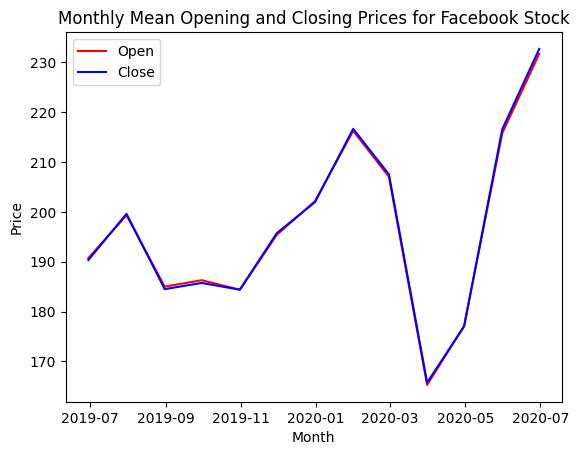

In [47]:
# Plot the opening and closing prices over this time period
plt.plot(monthly["open"], color="red", label="Open")
plt.plot(monthly["close"], color="blue", label="Close")
plt.title("Monthly Mean Opening and Closing Prices for Facebook Stock")
plt.xlabel("Month")
plt.ylabel("Price")
plt.legend()
plt.show()